In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
import itertools
import math
import random

In [2]:
df = pd.DataFrame(np.random.randn(20, 4), columns=list('ABCD'))
df.head(3)

,A,B,C,D
0,0.380334,0.175299,-0.922386,0.188577
1,-1.707006,0.747343,0.878157,-0.995265
2,0.811849,-0.506869,1.253722,-0.110283


## Scatter plot.

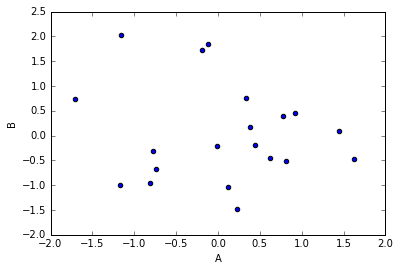

In [3]:
df.plot.scatter('A', 'B')
plt.show()

## Autocorrelation plot.

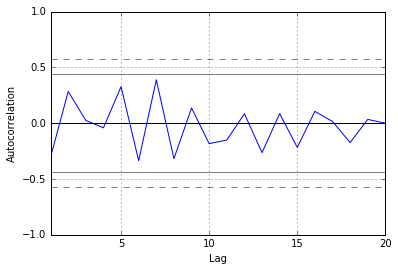

In [4]:
autocorrelation_plot(df['A'])

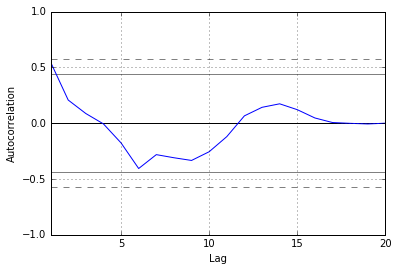

In [5]:
df['E'] = np.cumsum(df['B'].values)
autocorrelation_plot(df['E'])

## Dataframe with multiple types

In [6]:
df_1 =  pd.DataFrame({'x': pd.Series(['1.0', '2.0', '3.0'], dtype=float), 
                        'y': pd.Series(['1', '2', '3'], dtype=int)})
df_1.dtypes

x    float64
y      int32
dtype: object

## Pandas histogram without matplotlib

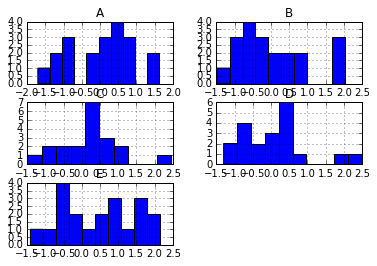

In [7]:
df.hist()
plt.show()

## Multiple column numpy array 

In [8]:
np_arr = np.random.randint(10, size=(3,3))
np_arr

array([[6, 8, 5],
       [7, 1, 5],
       [7, 8, 3]])

## Copying objects in Python

In [9]:
np_shallow = np_arr
np_deep = np.copy(np_arr)

## Shuffle list in python

In [10]:
np.random.shuffle(np_arr)
np_arr

array([[7, 1, 5],
       [6, 8, 5],
       [7, 8, 3]])

## Pass by object in Python

In [11]:
some_guy = 'Fred'

first_names = []
first_names.append(some_guy)

some_guy = 'Bill'
another_list_of_names = first_names
another_list_of_names.append('George')

print (some_guy, first_names, another_list_of_names)

('Bill', ['Fred', 'George'], ['Fred', 'George'])


## Insertion Sort

In [37]:
np_arr = np.array([4,3,6,19,200,4,3,2,11,22,426,72,-12])

def Insertion_Sort(arr):
    for i in xrange(1, len(arr)):
        curr_val = arr[i]
        pos = i
        
        while pos > 0 and arr[pos-1] > curr_val:
            arr[pos] = arr[pos-1]
            pos -= 1
        
        arr[pos] = curr_val
    
    return arr
        
Insertion_Sort(np_arr)        

array([-12,   2,   3,   3,   4,   4,   6,  11,  19,  22,  72, 200, 426])

## Max and min local peaks in time series data

In [13]:
def Peak_Detect(y_axis, x_axis = None, lookahead = 200):
    max_peaks = []
    min_peaks = []
    
    mn, mx = np.Inf, -np.Inf
    length = len(y_axis)
    
    for index, (x,y) in enumerate(zip(x_axis[:-lookahead], 
                                      y_axis[:-lookahead])):
        if y > mx:
            mx = y
            maxpos = x
        if y < mn:
            mn = y
            minpos = x
        
        if y < mx and mx != np.Inf:
            if y_axis[index:index+lookahead].max() < mx:
                max_peaks.append([maxpos, mx])
            
                mx = np.Inf  # know to calculate min next
                mn = np.Inf
            
                if index + lookahead >= length:
                    break
                continue
            
        if y > mn and mn != -np.Inf:
            if y_axis[index:index+lookahead].min() > mn:
                min_peaks.append([minpos, mn])
                
                mn = -np.Inf # know to calculate max next
                mx = -np.Inf

                if index+lookahead >= length:
                    break
                    
    return np.array(max_peaks), np.array(min_peaks)

In [33]:
vals = [-0.00399332, -0.00501114, -0.00640402, -0.00750487, -0.00460755, -0.00534264,
 -0.00957654, -0.01111667, -0.0119474,  -0.01404759, -0.01420562, -0.01596233,
 -0.01519988, -0.01682768, -0.01805558, -0.0176738,  -0.01906593, -0.01943003,
 -0.01421437, -0.01323735, -0.01217016, -0.01056259, -0.01287094, -0.0124015,
 -0.00907774, -0.010471,   -0.01146105, -0.01328951, -0.00825102, -0.00639496,
 -0.00926081, -0.01112057, -0.0097652, -0.01450879, -0.01324745, -0.01194674,
 -0.01313179, -0.01391071, -0.01266975, -0.01340575, -0.01142814, -0.01329988,
 -0.01447793, -0.01348421, -0.013527,   -0.01370626, -0.01505834, -0.01484215,
 -0.01538489, -0.01817894, -0.01776924, -0.01689804, -0.01508092, -0.01428668,
 -0.01413092, -0.01239543, -0.01099725, -0.0121226,  -0.01292538, -0.01741441,
 -0.01396212, -0.01316384, -0.01154396, -0.01220751, -0.01435542, -0.01076467,
 -0.00939423, -0.0125637,  -0.01212795, -0.01259259, -0.01086048, -0.00998138,
 -0.01040789, -0.00934927, -0.01049216, -0.01119659, -0.0083522,  -0.00917484,
 -0.00726601, -0.0065851,  -0.00496891, -0.00580918, -0.00448713, -0.00675028,
 -0.00965486, -0.01367697, -0.01348632, -0.012888,   -0.01281895, -0.01387172,
 -0.01220003, -0.00942561, -0.00992342, -0.01258885, -0.01252111, -0.01178422,
 -0.01230181, -0.0123231,  -0.01305616, -0.0129302, ]
rng = pd.date_range('1/1/2011', periods=len(vals), freq='D')
df = pd.DataFrame({'Value': vals}, index=rng)

df_max_peaks, df_min_peaks = Peak_Detect(df['Value'].values, df.index, 10)
df_max_peaks[:,0]
for val in df_max_peaks[:,1]:
    print val
print df_max_peaks[:,1].astype(float)

-0.00399332
-0.00639496
-0.01142814
-0.00448713
[-0.00399332 -0.00639496 -0.01142814 -0.00448713]


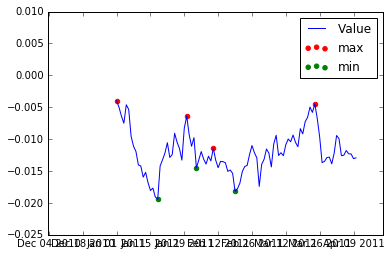

In [34]:
plt.scatter(df_max_peaks[:,0], df_max_peaks[:,1].astype(float), color='r', label='max')
plt.scatter(df_min_peaks[:,0], df_min_peaks[:,1].astype(float), color='g', label='min')
plt.plot(df.index, df['Value'])
plt.legend()
plt.show()

## Third smallest value in dataframe 

In [16]:
df.sort_values('Value', inplace=True, ascending=False)
print df.head(5)
print '\n third smallest: ', df['Value'][2]

               Value
2011-01-01 -0.003993
2011-03-24 -0.004487
2011-01-05 -0.004608
2011-03-22 -0.004969
2011-01-02 -0.005011

 third smallest:  -0.00460755


## Generate all permutations of list

In [17]:
list(itertools.permutations([1,2,3]))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

## Using generators

In [18]:
def f(l):
    return [x**3 for x in xrange(l)]

for x in f(5):
    print x,

0 1 8 27 64


## Determine if prime

In [19]:
def isPrime(nums):
    if n == 1:
        return False
    if n % 2 == 0:
        return False
    for i in range(3,int(math.ceil(math.sqrt(n))), 2):
        if n % i == 0:
            return False
    return True


In [20]:
nums = random.sample(xrange(1,1000000000), 10)
nums = list(set(nums))
for n in nums:
    print n, ':', isPrime(n)
    

446077220 : False
920134630 : False
513841864 : False
909806479 : False
339464818 : False
563561047 : False
550457764 : False
23059963 : False
330177726 : False
488569503 : False


## Rolling averages and means

In [21]:
np_arr = np.array(random.sample(xrange(1,100), 30))
means = pd.rolling_mean(np_arr, window=5, min_periods=5)
means = means[~np.isnan(means)]
means

array([ 46.2,  44.4,  47.6,  38.4,  48.8,  39.4,  50.2,  40.4,  46.6,
        41.4,  57.6,  51.8,  50.2,  57.2,  53.2,  39.6,  31. ,  42.8,
        25.6,  27. ,  26.2,  38.8,  29. ,  34.6,  49.2,  60. ])

In [22]:
def Find_Min(arr):
    return min(arr)

means = pd.rolling_apply(np_arr, window=5, func=lambda x: Find_Min(x))
means = means[~np.isnan(means)]
means

array([  3.,   3.,   3.,   3.,  31.,   1.,   1.,   1.,   1.,   1.,  25.,
        25.,  17.,  17.,   9.,   9.,   9.,   9.,   9.,  11.,  10.,  10.,
        10.,  10.,  10.,  27.])

## Filter function

In [23]:
integers = [x for x in range(10)]
filter(lambda x: x % 2 == 0, integers)

[0, 2, 4, 6, 8]

In [24]:
map(lambda x: x**2, integers)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## Different array creation techniques

In [25]:
arr = np.arange(0,9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [26]:
print np.std(arr)
print np.average(arr)

2.58198889747
4.0


In [27]:
arr.astype(float)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])